# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [ ]:
# Q1
display(df.head(5))

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,...,90,365,1,0,f,f,f,flexible,f,f
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,13,151,313,69,f,f,f,moderate,f,f
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,0,0,78,8,f,f,f,moderate,t,t
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [ ]:
#Q2 
null_count=df.isnull().sum()
df_null_count=null_count.to_frame()
df_missingnum=pd.DataFrame(columns=["missing_num"])
df_missingnum["missing_num"]=df_null_count
null_percent=(df.isnull().sum() / len(df) *100).round(2)
df_null_percent=null_percent.to_frame()
df_missingpercent=pd.DataFrame(columns=["missing_%"])
df_missingpercent["missing_%"]=df_null_percent
df_null= pd.concat([df_missingnum, df_missingpercent], axis=1)
df_null=df_null.sort_values(by="missing_num",ascending=False)
df_null=df_null[df_null["missing_num"] >0]
display(df_null)

,missing_num,missing_%
jurisdiction_names,50781,99.97
license,50759,99.93
square_feet,50407,99.23
monthly_price,46119,90.79
weekly_price,45411,89.40
host_response_rate,19006,37.42
host_response_time,19006,37.42
security_deposit,17325,34.11
host_acceptance_rate,14015,27.59
review_scores_location,11482,22.60


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

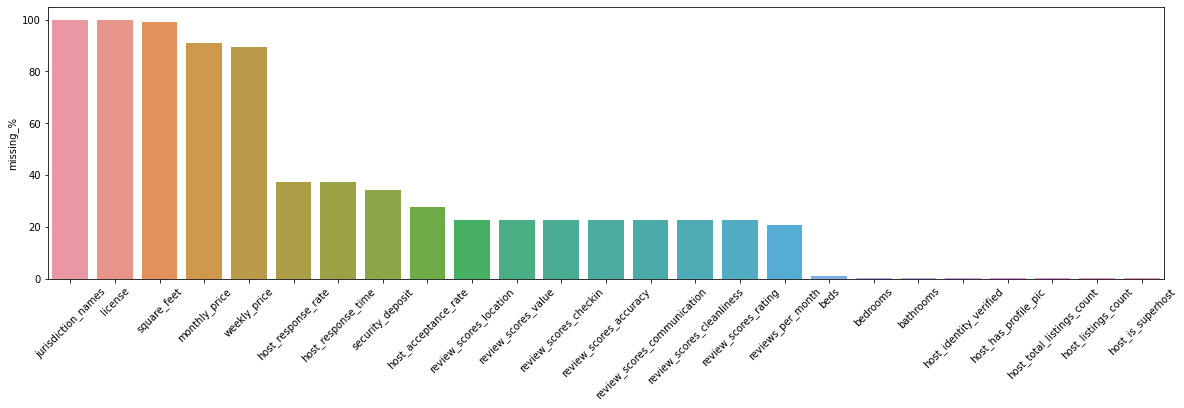

In [ ]:
# Q3

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45, fontsize=10)
sns.barplot(x=df_null.index, y = 'missing_%', data = df_null)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [ ]:
# Q4
df_beds_null=df[df['beds'].isnull()]
display(df_beds_null.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [ ]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [ ]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

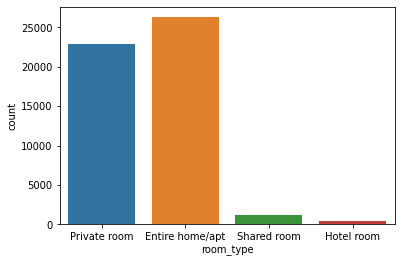

In [ ]:
# Q5
sns.countplot(x = 'room_type', data = df)


- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

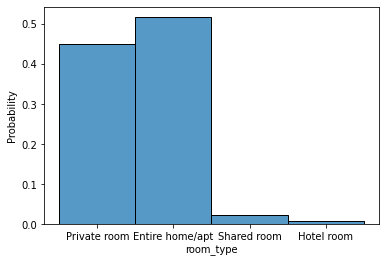

In [ ]:
sns.histplot(df, x="room_type", stat="probability")

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

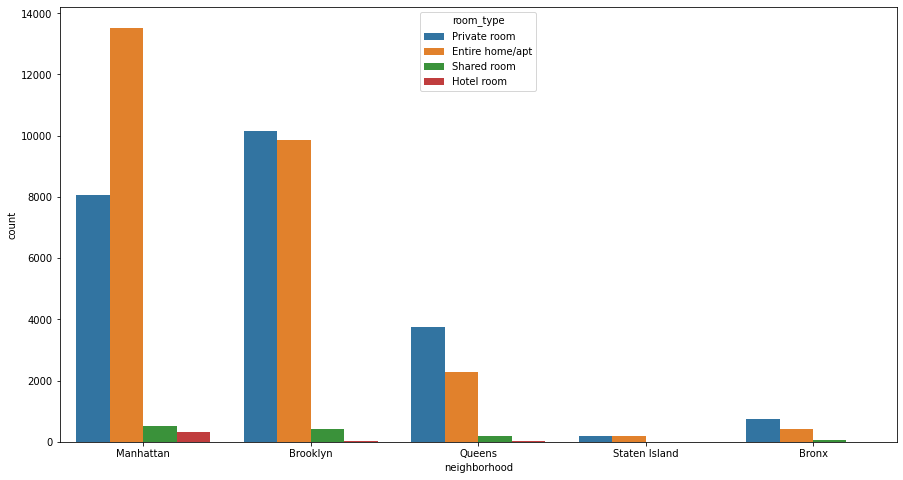

In [ ]:
# Q7
plt.figure(figsize=(15, 8))
sns.countplot(x = 'neighborhood', hue="room_type" ,data = df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

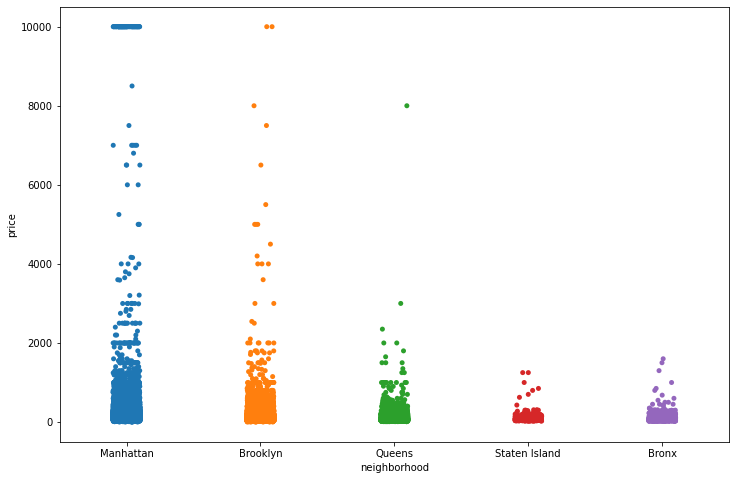

In [ ]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(12, 8))
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
"""
staten island, Bronx 지역의 방에 대한 데이터가 부족하지만, 그래도 대부분의 price가 낮기 때문에 그 지역의 호스트들에게는 낮은 price를 추천할 수 있다.
그 지역 방 값의 중앙값이나 평균값을 제공한다면 host가 price를 결정하는데 더 많은 도움이 될 것이다.
Queens neighborhood에는 매우 높은 값을 가진 outlier가 존재하기 때문에 그 방의 price를 제외한 방 값의 중앙값이나 평균값을 제공하는 것이 좋다.
Manhattan과 Brooklyn은 많은 데이터를 가지고 있고 타 지역에 비해 다양한 room_type이 존재한다. 위의 price 분포를 보면 알 수 있듯이 방마다 price 편차가 크다.
그렇기에 Manhattan과 Brooklyn에 있는 방은 당장 price를 책정하기에는 이르다.
room_type에 따른 price나 다른 data가 price에 어떤 영향을 미치는지를 더 분석한 후에 적당한 price를 책정할 수 있을 것이다.
"""


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

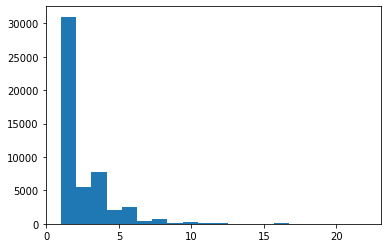

In [ ]:
# Q10
plt.hist(x = "accommodates", data = df, bins = 20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

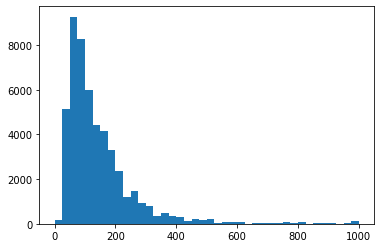

In [ ]:
# Q11
plt.hist(x = "price", data = df,bins=40,range = [0, 1000])
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [ ]:
#Q12
null_count=df.isnull().sum()
df_null_count=null_count.to_frame()
df_missingnum=pd.DataFrame(columns=["missing_num"])
df_missingnum["missing_num"]=df_null_count
null_percent=(df.isnull().sum() / len(df) *100).round(2)
df_null_percent=null_percent.to_frame()
df_missingpercent=pd.DataFrame(columns=["missing_%"])
df_missingpercent["missing_%"]=df_null_percent
df_null= pd.concat([df_missingnum, df_missingpercent], axis=1)
df_null=df_null.sort_values(by="missing_num",ascending=False)

df_1=df_null[df_null["missing_%"] >=25]
df_1_index=df_1.index
df=df.drop(df_1_index, axis=1)

df_3=df_null[df_null["missing_%"]<10]
df_3_index=df_3.index
df=df.fillna(df[df_3_index].median())

df=df.dropna(axis=0)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39290 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39290 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39290 non-null  float64
 3   host_total_listings_count         39290 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39290 non-null  object 
 8   latitude                          39290 non-null  float64
 9   longitude                         39290 non-null  float64
 10  is_location_exact                 39290 non-null  object 
 11  property_type                     39290 non-null  object 
 12  room

<ipython-input-232-b49ab41667c5>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df[df_3_index].median())


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [ ]:
#Q13-1)
'''
requires_license의 값이 모두 F이므로 필요없는 데이터이다
requires_license column을 삭제한다
'''
print(df["requires_license"].value_counts())
df=df.drop("requires_license", axis=1)

f    39290
Name: requires_license, dtype: int64


In [ ]:
#Q13-2)
"""
beds의 값이 0인데 bedrooms가 1 이상인 data들이 있다
신뢰할 수 없는 데이터이기에 추출한다.
"""
df_nobedrooms=df[df["bedrooms"] ==0]
df_nobedrooms_yesbeds=df_nobedrooms[df_nobedrooms["beds"]!=0]
print(df_nobedrooms_yesbeds[["bedrooms","beds"]].head(30))

     bedrooms  beds
1         0.0   1.0
166       0.0   1.0
205       0.0   2.0
224       0.0   2.0
255       0.0   1.0
322       0.0   1.0
336       0.0   2.0
349       0.0   2.0
357       0.0   2.0
373       0.0   1.0
378       0.0   3.0
381       0.0   2.0
384       0.0   1.0
454       0.0   1.0
475       0.0   1.0
499       0.0   2.0
502       0.0   1.0
514       0.0   2.0
530       0.0   2.0
544       0.0   1.0
549       0.0   1.0
550       0.0   1.0
576       0.0   1.0
662       0.0   1.0
665       0.0   2.0
699       0.0   1.0
729       0.0   1.0
794       0.0   2.0
798       0.0   3.0
807       0.0   1.0


In [ ]:
#Q13-3)
"""
에어비엔비를 사용할 때에는 보통 1박을 하는 경우가 가장 많다
minimum_nights가 1인 data와 더 큰 data를 구별하는 onenight_possible column을 새로 만든다
"""
df["onenight_possible"]=0
df["onenight_possible"] = np.where(df["minimum_nights"]==1, 'possible', 'impossible')
print(df["onenight_possible"].head(30))


1     impossible
2       possible
3     impossible
4       possible
5     impossible
6     impossible
7     impossible
8       possible
9     impossible
10    impossible
11    impossible
12    impossible
13    impossible
14    impossible
15    impossible
16      possible
17    impossible
19    impossible
20      possible
21    impossible
22    impossible
24    impossible
25    impossible
26    impossible
27    impossible
28      possible
29    impossible
30    impossible
32      possible
33    impossible
Name: onenight_possible, dtype: object


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
